In [15]:
import random
import numpy as np
import heapq
import sys

class Vertex:
    def __init__(self, n, li):
        self.data = n
        self.distance = sys.maxsize
        self.neighbors = li
        
    def __lt__(self, other):
        return self.distance < other.distance
    
    def setNeighbors(self, neighbors):
        self.neighbors = neighbors
    
    def getNeighbors(self):
        return self.neighbors
    
    def setDistance(self, dist):
        self.distance = dist
    
    def getDistance(self):
        return self.distance
    
    def getData(self):
        return self.data

class Graph:
    def __init__(self, n, p):
        self.adjacencyList = adjacencyListGenerator(n, p)
        self.vertices = verticesGenerator(n, self.adjacencyList)
    
    def getVertices(self):
        return self.vertices
    
    def setNeighbors(self):
        for vertex in self.vertices:
            vertex.setNeighbors(self.adjacencyList[vertex.getData()])
    
def randomNumberGenerator(p):
    values = [0, 1]
    probabilities = [p, 1-p]
    return np.random.choice(values, 1, p=probabilities)
    
def adjacencyListGenerator(n, p):
    adjacencyList = [[] for x in range(n)]
    for i in range(0, n):
        for j in range(0, n):
            if(i != j):
                ret = randomNumberGenerator(p)
                if(ret == 1):
                    adjacencyList[i].append((j, random.uniform(0, 1)))
    return adjacencyList

def verticesGenerator(n, adjacencyList):
    vertices = {}
    for i in range(0, n):
        newVertex = Vertex(i, adjacencyList[i])
        if(i == 0):
            newVertex.setDistance(0)
        #newVertex.setNeighbors(adjacencyList[i])    
        vertices[i] = newVertex
    return vertices

def minDistance(vertices):
    minDist = sys.maxsize
    index = -1;
    for i, vertex in enumerate(vertices):
        if(vertex.getDistance() <= minDist):
            minDist = vertex.getDistance()
            index = i
    return index

def DijkstraWithHeap(graph):
    vertices = list(graph.getVertices().values())
    visited = set()
    queue = []
    heapq.heapify(queue)
    for vertex in vertices:
        heapq.heappush(queue, vertex)
    while queue:
        curr = heapq.heappop(queue)
        visited.add(curr)
        for pair in curr.getNeighbors():
            if pair[1] + curr.getDistance() < vertices[pair[0]].getDistance():
                vertices[pair[0]].setDistance(pair[1] + curr.getDistance())
    '''
    for vertex in vertices:
        print(vertex.getData(), vertex.getDistance())
    '''


def DijkstraWithArray(graph):
    vertices = vertices = list(graph.getVertices().values())
    visited = set()
    queue = []
    for vertex in vertices:
        queue.append(vertex)
    while queue:
        curr = queue.pop(minDistance(queue))
        visited.add(curr)
        for pair in curr.getNeighbors():
            if pair[1] + curr.getDistance() < vertices[pair[0]].getDistance():
                vertices[pair[0]].setDistance(pair[1] + curr.getDistance())
    '''
    for vertex in vertices:
        print(vertex.getData(), vertex.getDistance())
    '''
        
    
    
    


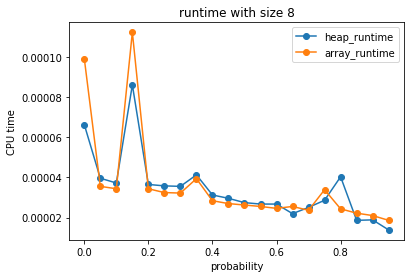

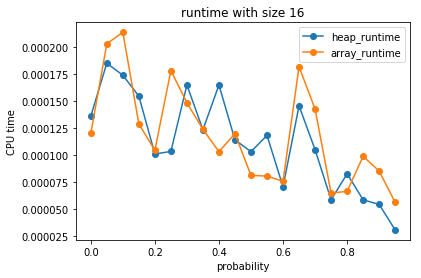

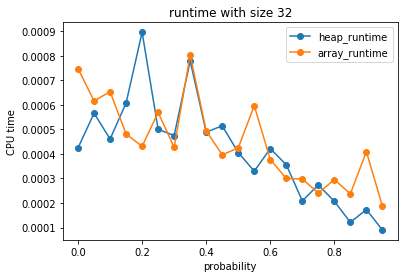

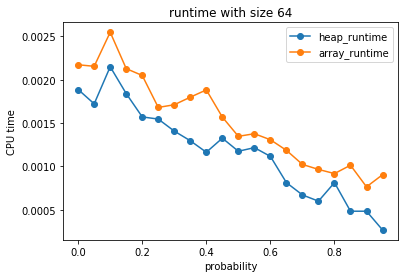

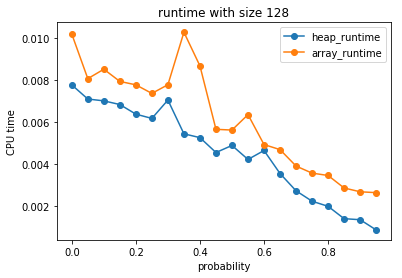

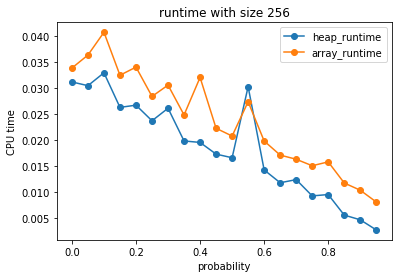

In [16]:
import time
import math
import matplotlib.pyplot as plt

for i in range(3, 9):
    heap_time = []
    array_time = []
    probability = []
    size = int(math.pow(2, i))
    p = 0
    while p <= 1:
        probability.append(p)
        graph = Graph(size, p)
        start_time = time.time()
        DijkstraWithHeap(graph)
        CPU_time = time.time()-start_time
        heap_time.append(CPU_time)
        start_time = time.time()
        DijkstraWithArray(graph)
        CPU_time = time.time()-start_time
        array_time.append(CPU_time)
        p = p + 0.05
    heap_line = plt.plot(probability, heap_time, marker='o', label="heap_runtime")
    array_line = plt.plot(probability, array_time, marker='o', label="array_runtime")
    #plt.ylabel("log(CPU time)/log2")
    plt.ylabel("CPU time")
    plt.xlabel("probability")
    plt.title("runtime with size " + str(size))
    plt.legend()
    #plt.figure(figsize=(20,10))
    plt.savefig(str(i) + ".png")
    plt.show()
